In this example, it was demonstrated -
1. Neighbourhood influences prices.
2. There's a Correlation of guests to prices by the neighbourhood.
3. There's a strong relationship of Guest's Review rating to responsive of the host.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns
import qgrid
import datetime
import sympy as S
import scipy

In [2]:
data = pd.read_csv('seattlelistings.csv')

In [3]:
data['neighbourhood_group_cleansed'].unique()
data['price'] = (data['price'].str.replace('$', ''))
data['price'] = (data['price'].str.replace('.00', ''))

data['price'] = pd.to_numeric(data['price'])

In [4]:
data.pivot_table(index='neighbourhood',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Alki,208.000000,234.333333,NaN
Arbor Heights,NaN,54.000000,NaN
Atlantic,138.375000,67.875000,NaN
Ballard,151.835938,67.500000,NaN
Belltown,168.700565,84.111111,58.333333
...,...,...,...
Wallingford,164.654762,65.454545,40.833333
Wedgewood,179.400000,67.000000,NaN
Westlake,273.000000,99.800000,NaN


In [5]:
data['neighbourhood_group_cleansed'].unique()
set(data['neighbourhood_group_cleansed'])

{'Ballard',
 'Beacon Hill',
 'Capitol Hill',
 'Cascade',
 'Central Area',
 'Delridge',
 'Downtown',
 'Interbay',
 'Lake City',
 'Magnolia',
 'Northgate',
 'Other neighborhoods',
 'Queen Anne',
 'Rainier Valley',
 'Seward Park',
 'University District',
 'West Seattle'}

In [6]:
data.pivot_table(index='neighbourhood_group_cleansed',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group_cleansed,,,
Ballard,154.927007,66.487805,NaN
Beacon Hill,123.925926,66.362069,43.333333
Capitol Hill,151.876471,90.607407,41.473684
Cascade,149.392857,88.772727,50.000000
Central Area,150.150000,78.181159,59.500000
Delridge,95.675000,62.555556,NaN
Downtown,160.218391,100.146341,54.941176
Interbay,153.800000,73.000000,NaN
Lake City,128.733333,58.485714,NaN


In [7]:
for gp in set(data['neighbourhood_group_cleansed']):
    print(data.loc[data['neighbourhood_group_cleansed']==gp,].groupby(['neighbourhood_group_cleansed','neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price', 'mean'),ascending=False).head())
    print()

                                           price            
                                           count        mean
neighbourhood_group_cleansed neighbourhood                  
Ballard                      Fremont           2  265.000000
                             Phinney Ridge     2  152.000000
                             Ballard         195  121.138462
                             Greenwood         1   90.000000
                             Crown Hill        1   35.000000

                                           price            
                                           count        mean
neighbourhood_group_cleansed neighbourhood                  
Interbay                     Magnolia          2  120.000000
                             Interbay          6   98.166667
                             Queen Anne        1   53.000000

                                                    price            
                                                    count        mean
neig

In [8]:
for gp in set(data['neighbourhood_group_cleansed']):
    print(gp)
    print(data[data['neighbourhood_group_cleansed']==gp][['price','guests_included']].corr())
    print()

Ballard
                    price  guests_included
price            1.000000         0.551029
guests_included  0.551029         1.000000

Interbay
                    price  guests_included
price            1.000000         0.331837
guests_included  0.331837         1.000000

Beacon Hill
                    price  guests_included
price            1.000000         0.485595
guests_included  0.485595         1.000000

Capitol Hill
                    price  guests_included
price            1.000000         0.612185
guests_included  0.612185         1.000000

Rainier Valley
                  price  guests_included
price            1.0000           0.5373
guests_included  0.5373           1.0000

Lake City
                    price  guests_included
price            1.000000         0.315564
guests_included  0.315564         1.000000

Central Area
                   price  guests_included
price            1.00000          0.40866
guests_included  0.40866          1.00000

University District

In [9]:
# in order to highlight relationship of ratings to responsiveness, it may be necessary to reduce the 'noise'.
# Hence prices were picked up < 500
pdata = data[data['price']<500]

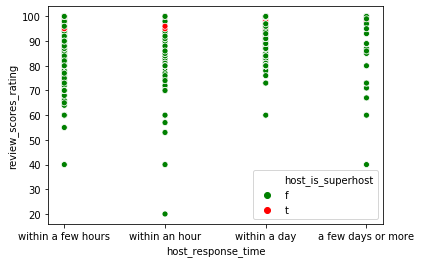

In [10]:
g =sns.scatterplot(x="host_response_time", y="review_scores_rating", hue="host_is_superhost", 
                   data=pdata,palette=['green','red'], legend='full')
# g =sns.scatterplot(x="host_response_time", y="price", hue="host_is_superhost",
#              data=pdata,palette=['green','red'], legend='full')